# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

# Loading the data

In [2]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv', engine='python', names=['target', 'ids', 'date', 'flag', 'user', 'text'])
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df['target'].unique()

array([0, 4])

In [4]:
df.describe()

,target,ids
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [5]:
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [6]:
df.shape

(1600000, 6)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(1600000, 6)

In [9]:
df['flag'].unique()

array(['NO_QUERY'], dtype=object)

In [10]:
df.drop('flag', axis=1, inplace=True)

In [11]:
df['ids'].value_counts()

1753678185    2
1678693526    2
1835870889    2
2190104868    2
1984377787    2
             ..
2056931811    1
2212131300    1
2188589814    1
1983537638    1
1964587131    1
Name: ids, Length: 1598315, dtype: int64

In [12]:
df

,target,ids,date,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [13]:
df['date'] = pd.to_datetime(df['date'],origin='unix')

/home/vipin/.local/lib/python3.6/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [14]:
df

,target,ids,date,user,text
0,0,1467810369,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...
1599995,4,2193601966,2009-06-16 08:40:49,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,2009-06-16 08:40:49,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,2009-06-16 08:40:49,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,2009-06-16 08:40:49,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


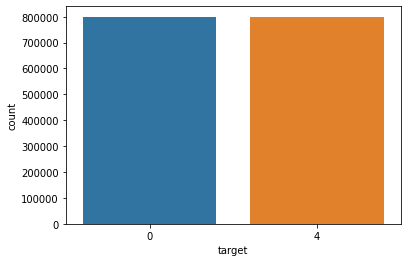

In [15]:
sns.countplot(df['target'])

In [16]:
df['target'] = df['target'].map({0:0, 4:1})

In [17]:
for i in df['text'].values:
    if(len(re.findall('.<*?>', i))):
        print(i)
        print('\n')

In [18]:
stopwords = set(stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [19]:
stopwords.difference_update({'against', 'ain','aren',
 "aren't",'couldn',
 "couldn't",'couldn',
 "couldn't",'didn',
 "didn't",'don',
 "don't",'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",'isn',
 "isn't",'mightn',
 "mightn't",'mustn',
 "mustn't",'needn',
 "needn't",
 'no',
 'nor',
 'not','shouldn',
 "shouldn't",'weren',
 "weren't",'won',
 "won't",
 'wouldn',
 "wouldn't","doesn't"})

In [20]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'd',
 'did',
 'do',
 'does',
 'doesn',
 'doing',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'has',
 'have',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'more',
 'most',
 'my',
 'myself',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 "shan't",
 'she',
 "she's",
 'should',
 "should've",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 'too',
 'und

In [21]:
def cleanpunc(sentences):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentences)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [22]:
from nltk.stem import SnowballStemmer
sno = SnowballStemmer('english')

In [23]:
str1=' '
s=' '
i = 0
final_string = []
for wor in df['text'].values:
    fil_wor = []
    for w in wor.split():
        for cleanedwords in cleanpunc(w).split(): #cleaning punctuation
            if(cleanedwords.isalpha() and len(cleanedwords)>2): #checking value is alpha numeric or not and we know adjective size is greater than 2
                if(cleanedwords.lower() not in stopwords):
                    s=(sno.stem(cleanedwords.lower())).encode('utf8') #applying stemmer and converting the character to lowercase
                    fil_wor.append(s)
    str1 = b" ".join(fil_wor) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [24]:
#copying the column to exixsting dataset
df['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review

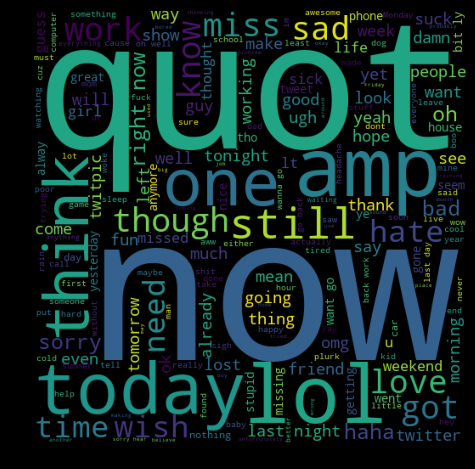

In [25]:
from wordcloud import WordCloud
spam_words = ' '.join(list(df[df['target'] == 0]['text']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.show()

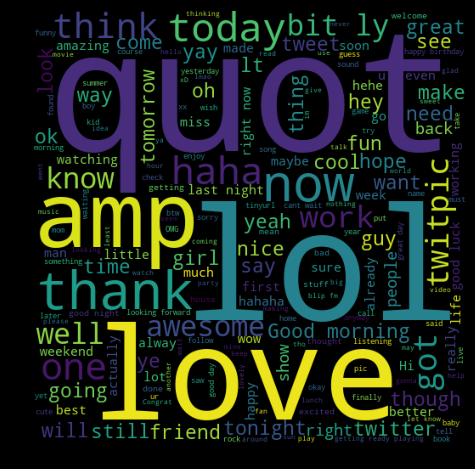

In [27]:
spam_words = ' '.join(list(df[df['target'] == 1]['text']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.show()

In [28]:
df

,target,ids,date,user,text,CleanedText
0,0,1467810369,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",b'twitpic com awww that bummer shoulda got dav...
1,0,1467810672,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,b'upset cant updat facebook text might cri res...
2,0,1467810917,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,b'dive mani time ball manag save rest bound'
3,0,1467811184,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,b'whole bodi feel itchi like fire'
4,0,1467811193,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all....",b'not behav mad cant see'
...,...,...,...,...,...,...
1599995,1,2193601966,2009-06-16 08:40:49,AmandaMarie1028,Just woke up. Having no school is the best fee...,b'woke school best feel ever'
1599996,1,2193601969,2009-06-16 08:40:49,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,b'thewdb com cool hear old walt interview blip'
1599997,1,2193601991,2009-06-16 08:40:49,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,b'readi mojo makeov ask detail'
1599998,1,2193602064,2009-06-16 08:40:49,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,b'happi birthday boo alll time tupac amaru sha...


In [29]:
Y = df['target']
df['CleanedText'] = df['CleanedText'].apply(str)

In [30]:
df['target'].map({0 : 0, 4: 1})

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1599995    NaN
1599996    NaN
1599997    NaN
1599998    NaN
1599999    NaN
Name: target, Length: 1600000, dtype: float64

In [31]:
from keras.utils import to_categorical
Y = to_categorical(Y)

Using TensorFlow backend.
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/fra

In [32]:
from keras.preprocessing.text import Tokenizer
tkn = Tokenizer(nb_words=2000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                   lower=True,split=' ')

tkn.fit_on_texts(df['CleanedText'].values)
from keras.preprocessing.sequence import pad_sequences


X = tkn.texts_to_sequences(df['CleanedText'].values)
X = pad_sequences(X)

/home/vipin/.local/lib/python3.6/site-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [34]:
 from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
embed_dim = 128
lstm_out = 196
max_fatures = 2000

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 115, 128)          256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 115, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
batch_size=2
model.fit(x_train, y_train,validation_split=0.2, epochs = 30, batch_size=batch_size)


Train on 1024000 samples, validate on 256000 samples
Epoch 1/30
    522/1024000 [..............................] - ETA: 17:44:25 - loss: 0.6961 - accuracy: 0.5326

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model.predict(x_test)
print('Accuracy : ',accuracy_score(y_test, pred.round()))